# Introduction to Matplotlib

Matplotlib is the basic plotting package in Python. The plotting functions in both Pandas and Symbulate are built on top of Matplotlib. 

Unfortunately, Matplotlib is somewhat painful to use. If the plot you want is not one of the standard graphics, you will have to write a lot of boilerplate code to get the graphic to look the way you want. However, Matplotlib is probably still the quickest way to make a simple graphic in Python, so it is worth learning the basics, even if you use a higher-level library (e.g. Seaborn, Altair, plotly) for most plots.

There are two interfaces to Matplotlib. The first is `pyplot`, which is a clone of MATLAB. The second is the general object-oriented interface. Of the two interfaces, `pyplot` is easier to use, but less powerful. Fortunately, the two interfaces can be used interchangeably, as we will see.

## Importing Matplotlib

You should always import the `pyplot` interface, instead of `matplotlib` directly -- even if you plan to use the object-oriented interface. This is the first hint that the two interfaces are interchangeable.

If you want the plots to show up in the notebook, you **must** include the line magic `%matplotlib inline`.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## `pyplot`: The MATLAB Interface

In my opinion, these are a few distinguishing features of plotting in MATLAB:

- There is a general `plot()` function, which can be used to produce most plots.
- If you want to add a legend, change the axis limits, change an axis label, etc., you make subsequent calls to functions like `xlabel()`, `xlim()`, `legend()`, etc.
- Repeated calls to `plot()` overlay the plots on the same graph.

The `pyplot` interface replicates all of these features.

Let's read in the Harris bank data set.

In [2]:
import pandas as pd
data = pd.read_csv("/data/harris.csv")

In [3]:
data.head()

,Bsal,Sal77,Sex,Senior,Age,Educ,Exper
0,5040,12420,Male,96,329,15,14.0
1,6300,12060,Male,82,357,15,72.0
2,6000,15120,Male,67,315,15,35.5
3,6000,16320,Male,97,354,12,24.0
4,6000,12300,Male,66,351,12,56.0


Let's make a plot showing the relationship between beginning salary and 1977 salary.

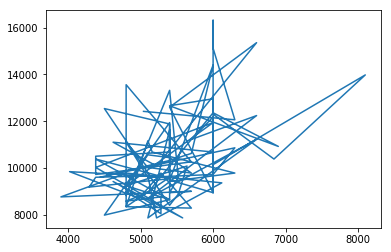

In [4]:
plt.plot(data["Bsal"], data["Sal77"])

Oops! By default, Matplotlib connects the observations $(x_i, y_i)$ by lines. We can customize this behavior by specifying the line/marker style in a format string as the (optional) third argument. For example, to specify that the observations should be plotted as points, we can use the `"."` format string.

The most commonly used line/marker styles are: `.`, `-`, `--`, `-.`, and `o`. 

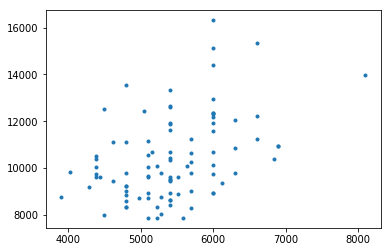

In [5]:
plt.plot(data["Bsal"], data["Sal77"], ".")

We can also specify the color in the format string, using the following single character abbreviations:

- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

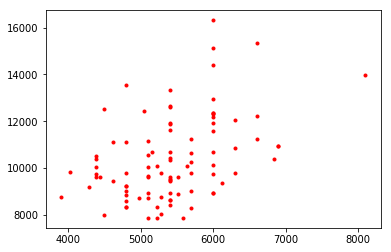

In [6]:
plt.plot(data["Bsal"], data["Sal77"], "r.")

Now let's adjust the x- and y-axes. Remember, we do this by making subsequent calls to functions like `plt.xlim()`, `plt.xlabel()`, etc. 

(Matplotlib supports $\LaTeX$, so your labels can contain mathematical expressions.)

(4000, 7000)

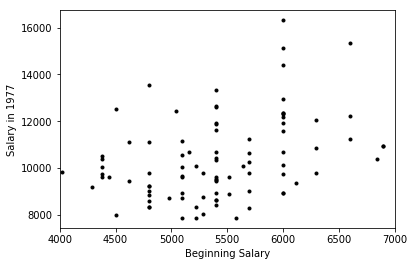

In [7]:
plt.plot(data["Bsal"], data["Sal77"], "k.")

plt.xlabel("Beginning Salary")
plt.ylabel("Salary in 1977")

plt.xlim(4000,7000)

**Exercise.** Make a scatterplot showing the relationship between beginning salary and 1977 salary for the Harris bank employees, with men represented by one color and women by another. Add a legend using `plt.legend()` to indicate which gender is which color.

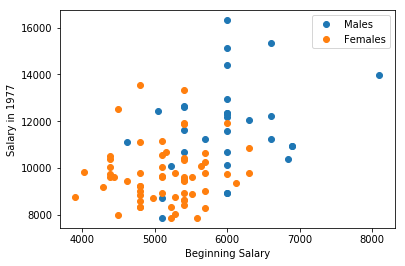

In [8]:
plt.plot(data[data.Sex == "Male"]["Bsal"], data[data.Sex == "Male"]["Sal77"], "o")
plt.plot(data[data.Sex == "Female"]["Bsal"], data[data.Sex == "Female"]["Sal77"], "o")

plt.xlabel("Beginning Salary")
plt.ylabel("Salary in 1977")

plt.legend(["Males","Females"]) ## can add argument "loc=AREA" to specify where we want legend

## Object-Oriented Interface

In the object-oriented interface, a figure is a `Figure` object containing one or more `Axes` objects. Plots are added to `Axes`, and `Axes` have methods that allow you to customize them. The `pyplot` interface manipulates these objects behind the scenes for you so that you don't have to worry about them. However, there are certain customizations that can only be achieved by manipulating the underlying `Axes` object.

For example, suppose we want to eliminate some "chartjunk" from the scatterplot: the top and right borders.

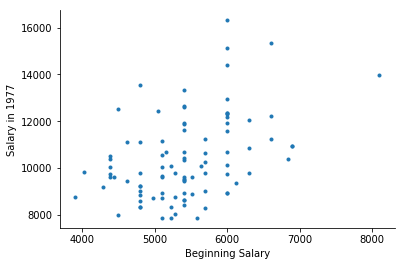

In [9]:
fig = plt.figure()
ax = plt.axes()

ax.plot(data["Bsal"], data["Sal77"], '.')
ax.set_xlabel("Beginning Salary")
ax.set_ylabel("Salary in 1977")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

## Mixing the Two Interfaces

Suppose you've already made a plot using the `pyplot` interface, but you need to access the underlying `Axes` object. Fortunately, Matplotlib provides functions that allow you to recover the `Figure` and `Axes` object after the fact.

- `plt.gcf()` gets the current `Figure` object.
- `plt.gca()` gets the current `Axes` object.

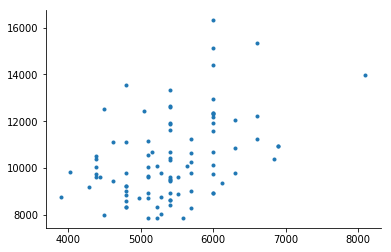

In [10]:
plt.plot(data["Bsal"], data["Sal77"], '.')

ax = plt.gca() ## Recover axes object and use it to remove top & right borders
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

## Plotting in Pandas

If you're working with Pandas `DataFrames` and `Series`, it is usually easier to call the wrapper functions that Pandas provides, rather than to use Matplotlib directly. These plotting methods can be found under the `DataFrame.plot` or `Series.plot` accessors and behave similarly to their Matplotlib counterparts.

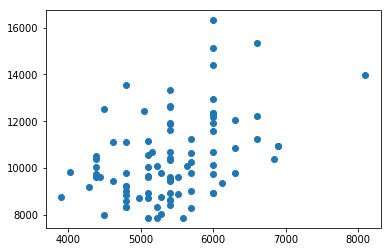

In [11]:
plt.scatter(data["Bsal"], data["Sal77"])

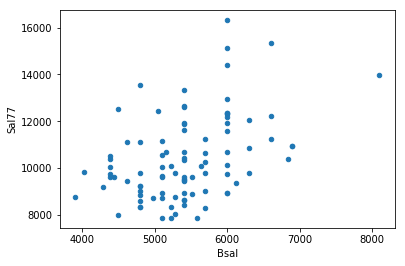

In [12]:
data.plot.scatter("Bsal", "Sal77")

In the case of bar graphs, the Pandas plotting wrappers are _much_ easier to use than Matplotlib. Let's make a bar graph showing the average beginning salary by sex and income.

First, let's calculate the numbers we want to plot.

In [13]:
means = data.groupby(["Educ", "Sex"])["Bsal"].mean()
means

Educ  Sex   
8     Female    4974.545455
      Male      6000.000000
10    Female    4020.000000
12    Female    5119.714286
      Male      5652.857143
15    Female    5470.000000
      Male      6092.000000
16    Female    4950.000000
      Male      7050.000000
Name: Bsal, dtype: float64

Now, let's call the `.plot.bar()` method of this `Series`.

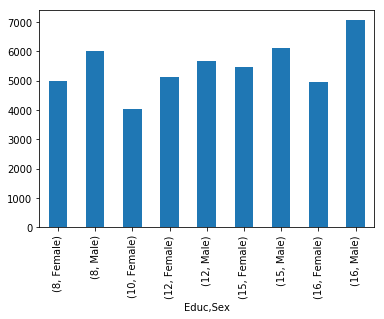

In [14]:
means.plot.bar()

Not quite what we wanted. Ideally, we'd like to have two bars for each education level, one for females and another for males. We can achieve this by **reshaping** the data.

In [15]:
means_reshaped = means.unstack()
means_reshaped

Sex,Female,Male
Educ,,
8,4974.545455,6000.000000
10,4020.000000,NaN
12,5119.714286,5652.857143
15,5470.000000,6092.000000
16,4950.000000,7050.000000


Pandas uses a different colored bar for each column in the data frame, so now `.plot.bar()` does the right thing.

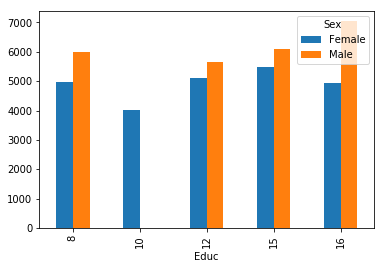

In [16]:
means_reshaped.plot.bar()

**Exercise.** Add error bars to the graph above, representing 95% confidence intervals for the average beginning salary.

_Hint:_ Use the `yerr=` argument of `.bar()`.

In [28]:
## IMPORTANT CODE
grouped_df = data.groupby(["Educ", "Sex"])["Bsal"]

n = grouped_df.count()
sd = grouped_df.std()

import numpy as np
std_err = (sd/np.sqrt(n)).unstack()
std_err

Sex,Female,Male
Educ,,
8,120.123903,NaN
10,NaN,NaN
12,93.591716,154.345227
15,137.146239,142.932552
16,150.000000,1050.000000


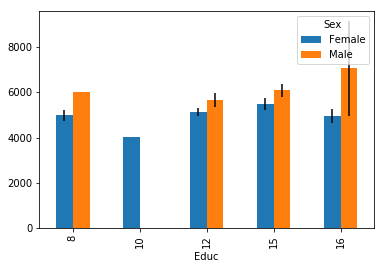

In [32]:
means_reshaped.plot.bar(yerr= 2*std_err)

**Bonus Exercise.** Just for kicks, [here](https://matplotlib.org/examples/api/barchart_demo.html) is an example of how you would make the same kind of bar graph using just Matplotlib. Try reproducing the bar graph you made above using Matplotlib. Why is it so much more complicated?

In [19]:
# ENTER YOUR CODE HERE.

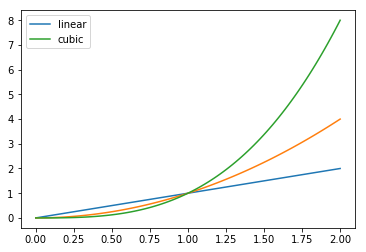

In [21]:
x = np.linspace(0, 2, 100)

plt.plot(x,x, label="linear")
plt.plot(x, x**2)
plt.plot(x, x**3, label="cubic")

plt.legend()

## F.A.Q.

**Question:** I imported Matplotlib, but my plots don't show up when I call `plt.plot()`. Why?

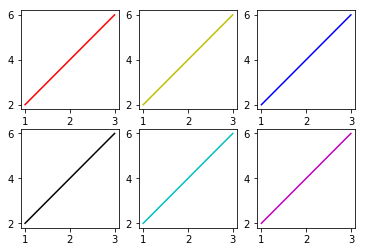

In [35]:
x = np.array([1, 2, 3])
y = np.array([2, 4, 6])

plt.subplot(2, 3, 1)
plt.plot(x, y, 'r')

plt.subplot(2, 3, 2)
plt.plot(x, y, 'y')

plt.subplot(2, 3, 3)
plt.plot(x, y, 'b')

plt.subplot(2, 3, 4)
plt.plot(x, y, 'k')

plt.subplot(2, 3, 5)
plt.plot(x, y, 'c')

plt.subplot(2, 3, 6)
plt.plot(x, y, 'm')